# Esercitazione 10

## Istruzioni
Valgono le stesse istruzioni delle esercitazioni precedenti. 

Scrivi il programma Python nella cella sotto il testo dell'esercizio (o creane una nuova). Stampa sempre a video il risultato finale per verificare la correttezza dell'esercizio.  Talvolta richiamiamo alcuni concetti importanti in una cella di codice sotto il testo dell'esercizio, prova a eseguirla ed eventualmente modificarla per assicurarti di aver capito il necessario.

**Nota.** Alcuni esercizi potrebbero richiedere una semplice risposta a delle domande. In questo caso potete scrivere la soluzione in una cella di tipo "Markdown".  


## Consegna
Valgono le regole delle esercitazioni precedenti.

E' obbligatorio **consegnare la soluzione di tutti gli esercizi** (tranne quelli marcati come opzionali) **entro l'inizio della lezione successiva** (in questo caso entro Lunedi' prossimo), nell'apposito assignment su iCorsi.  Per consegnare:
- eseguire l'intero notebook partendo da zero (`Kernel -> Restart & Run All`), e controllare che le soluzioni siano quelle attese;
- esportare il notebook in formato html (`File -> Download as...`) e consegnare il file risultante.

Nel caso non abbiate potuto completare uno o piu' esercizi, descrivete il problema incontrato e **consegnate comunque il file con il resto delle soluzioni**.

## Esercizio 1 

Si implementi l'algoritmo di clustering $k$-means. Nello specifico, si scriva una funzione ``Kmeans`` che riceve come parametri di ingresso:
- ``n_cluster``: numero di clusters ($k$)
- ``x``: osservazioni: vettore a 2 dimensioni con m righe (dove m è il numero di istanze) e n colonne (dove n è il numero di attributi)
- ``xC``: condizioni iniziali (ossia, valore iniziale dei centroidi del clusters). Sarà un vettore a 2 dimensioni con ``n_clusters`` righe e ``n`` colonne
- ``max_iter``: numero massimo di iterazioni dell'algoritmo k-means

La funzione restituisce:
- ``y``: vettore a 1 dimensione di lunghezza m. Ogni elemento del vettore rappresenta il cluster a cui è associata l'osservazione. Nota che se si considerano ``n_cluster=3`` clusters, allora ogni elemento di y puo' assumere valori 0, 1 o 2. 
- ``xC``: posizione finale dei centroidi del clusters. Sarà un array a 2 dimensioni con ``n_cluster`` righe e ``n`` colonne.

Testate il funzionamento della funzione costruita su un dataset di dati sintetici con 2 attributi, generati (e plottati) eseguendo la cella sotto. Ricordatevi di:
- Normalizzare gli attributi prima di eseguire la funzione Kmeans 
- In base al plot delle osservazioni, scegliete un numero di clusters ragionevole
- Poichè abbiamo solo 2 attributi, riplottate le osservazioni colorando il punto in base al cluster a cui è stato assegnato (es. plottate in blu tutti i punti assegnati al primo cluster, in rosso tutti i punti assegnati al secondo cluster, in verde tutti i punti assegnati al terzo cluster).
- Plottate anche la posizione del centroide di ogni cluster.  Ad esempio, potrebbe venirvi un risultato tipo questo:

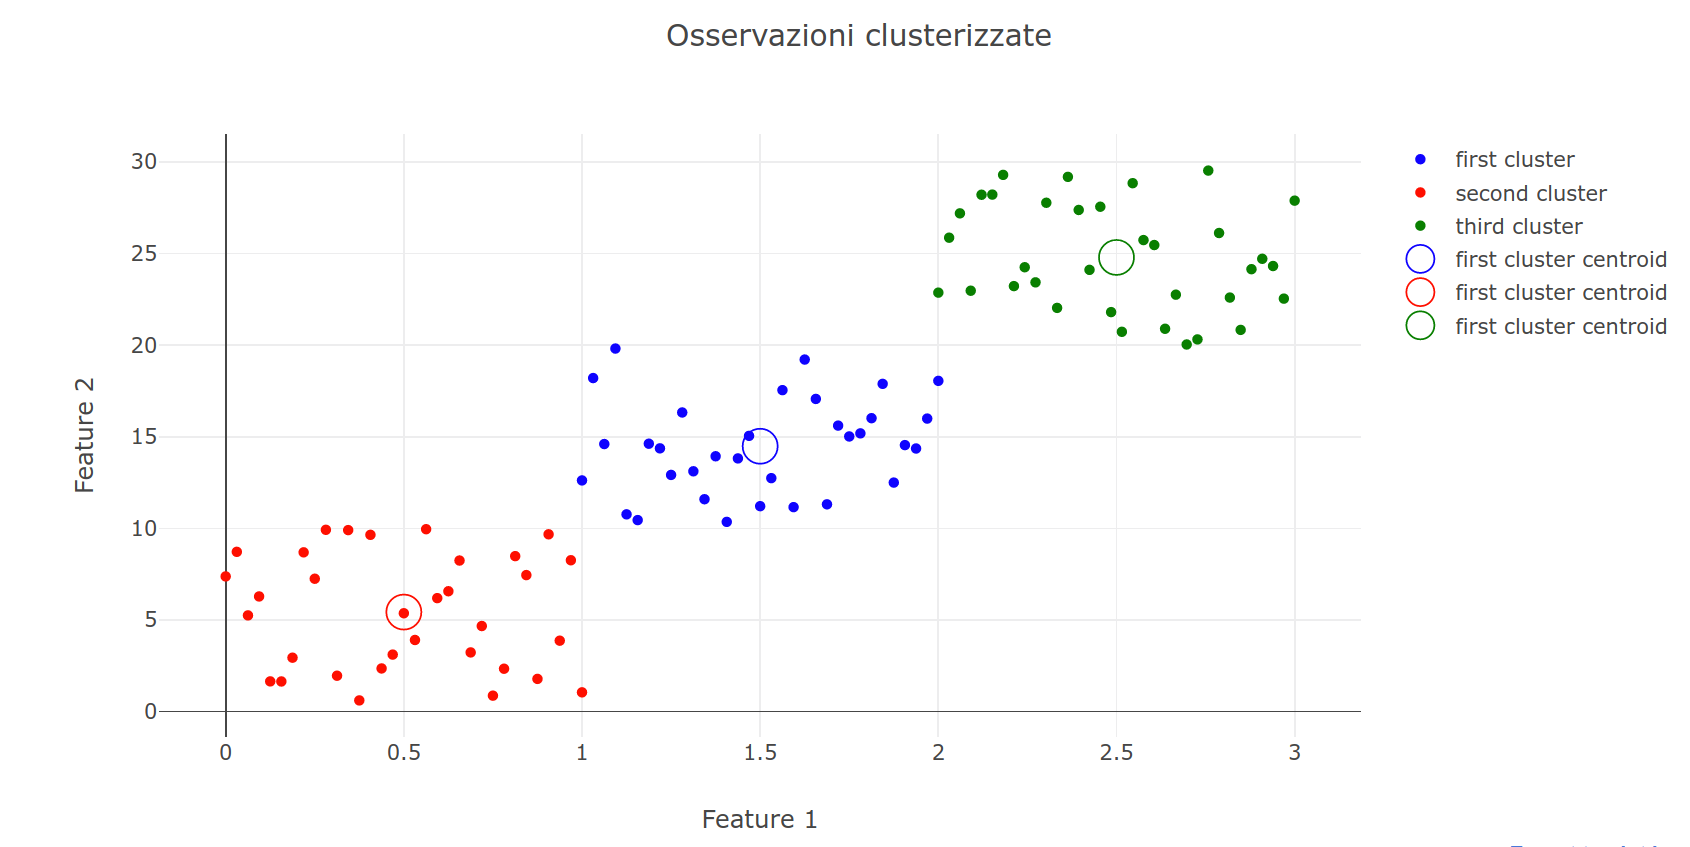

In [1]:
# Data generation

import numpy as np
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected = True)


m = 100 # Number of observations

# generate first feature
x1_1 = np.linspace(0,1,33)  
x1_2 = np.linspace(1,2,33)
x1_3 = np.linspace(2,3,34)

x1 = np.concatenate((x1_1,x1_2,x1_3))
x1 = np.reshape(x1,(-1,1))


# generate second feature
x2_1 = np.random.rand(33)*10  
x2_2 = np.random.rand(33)*10 + 10
x2_3 = np.random.rand(34)*10 + 20

x2 = np.concatenate((x2_1,x2_2,x2_3))
x2 = np.reshape(x2,(-1,1))

# Put first and second features in a single 2-D array
x = np.concatenate((x1,x2), axis = 1)

# Plot
data = go.Scatter(x = x1[:,0], y = x2[:,0], mode = 'markers')


layout = go.Layout(xaxis = dict(title = 'Feature 1'), yaxis = dict(title = 'Feature 2'), title = 'Scatter plot delle osservazioni generate')
fig = go.Figure([data], layout)
py.iplot(fig)

In [ ]:
# Solution (to be completed)

def Kmeans(n_clusters, x, xC, max_iter):
    
    dist = np.zeros( (np.shape(x)[0],n_clusters)) # Inizializzo matrice delle distanze (per ogni osservazione, calcolo la distanza dal centroide di ogni cluster)
    
     
    count = 0
    while(count < max_iter):
        
        ...
              
        count = count + 1
    
    return y, xC
        
      
        
n_clusters = ...   
max_iter = 100


xMean = ...
xStd  = ...
xScaled = ... 

np.random.shuffle(xScaled) # Scegli in maniera casuale i centroidi iniziali (mischia le osservazioni e scegli le prime "n_clusters" come centroidi iniziali)  
xC = xScaled[0:n_clusters,:] # Centroidi iniziali


(y, xC) = Kmeans(n_clusters, xScaled, xC, max_iter)



x = xScaled*xStd + xMean   # Denormalize data before plotting
xC = xC*xStd + xMean

layout = go.Layout(xaxis = dict(title = ' Feature 1'), yaxis = dict(title = ' Feature 2'), title = 'Osservazioni clusterizzate')
fig = go.Figure(...., layout)
py.iplot(fig)

## Esercizio 2

Si consideri il set di dati sintetici generati nell'esercizio precedente. Ripete l'operazione di clustering usando la funzione KMeans di sklearn. Esempi di applicazione della funzione KMeans potete trovarli [qui](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html)

E' possibile che la funzione da voi implementata e la funzione del modulo sklearn restituiscano 2 risultati diversi? Perchè?

In [ ]:
# Solution (to be completed)

from sklearn.cluster import KMeans

cls = KMeans(n_clusters=..., max_iter=100)
cls.fit(...)

y = cls.labels_  # labels ricavate 
xC = cls.cluster_centers_ # Final clusters' centroids

layout = go.Layout(xaxis = dict(title = ' Feature 1'), yaxis = dict(title = ' Feature 2'), title = 'Osservazioni clusterizzate')
fig = go.Figure(..., layout)
py.iplot(fig)

# Esercizio 3 (opzionale, ma divertente)

In questo esercizio useremo l'algoritmo K-Means per la quantizzazione dei colori in un immagine, con l'obiettivo finale di comprimere l'immagine.

Per prima cosa, carichiamo un'immagine eseguendo la cella sotto. L'immagine che caricheremo rappresenta un panorama ed è  disponibile online (con licenza di riutilizzo e modifica) al seguente [link](https://pxhere.com/it/photo/984644). Se volete,  potete usare un'altra immagine a vostro piacere. 

In [4]:
from skimage import io
import os
from sklearn.cluster import KMeans

image = io.imread('panorama.jpg')
io.imshow(image)
io.show()

rows = image.shape[0]
cols = image.shape[1]

print(f"Risoluzione: {rows}x{cols} pixels")

<Figure size 640x480 with 1 Axes>

Risoluzione: 800x1200 pixels


Eseguendo la cella sotto, noterete che l'immagine appena caricata è codificata come un array a 3 dimensioni. La prima e seconda dimensione hanno lunghezza 800 e 1200 (questa è la risoluzione dell'immagine in pixels), mentre la terza dimensione ha lunghezza 3. 

Ad un dato pixel sono infatti associati 3 numeri interi da 0 a 255, che rappresentano il colore del pixel secondo la codifica [*rgb*](https://it.wikipedia.org/wiki/RGB) (il primo valore rappresenta l'intensità del rosso, il secondo del verde, il terzo del blu).

Notate che, secondo questa codifica, ad ogni pixel è associata un informazione su 3 byte (1 byte per il rosso, uno per il verde, uno per il blu). In tutto, posso codificare 256x256x256 = 16777216 colori diversi!

In [5]:
print(f"Image type: {type(image)}; shape: {image.shape}")
print(f"Primo pixel: rgb={image[0,0,0], image[0,0,1], image[0,0,2]}")

Image type: <class 'numpy.ndarray'>; shape: (800, 1200, 3)
Primo pixel: rgb=(127, 211, 255)


## 3.1
Vogliamo comprimere l'immagine, riducendo il numero di possibili colori ad un numero molto ristretto (nello specifico, un numero pari a 4).

Per fare questo, trattate ogni pixel come un'osservazione, a cui sono associati 3 attributi (i 3 valori numerici della codifica rgb). In tutto avete quindi 800x1200=960000 istanze (o osservazioni). Eseguiamo la cella sotto per fare un reshape dell'immagine, in modo da avere un array con 960000 righe e 3 colonne.

In [6]:
x = image.reshape(image.shape[0]*image.shape[1],3)

Provate a capire come usare l'algoritmo k-means per scegliere i "4" colori in maniera automatica (e "ottimale" per l'immagine considerata!)  

Indicazioni e consigli:

### 3.1.1
Clusterizzare le osservazioni (ossia, i pixels dell'immagine originale) in *n_clusters = 4* clusters, usando come attributi i 3 valori della codifica rgb. In questo modo, punti con colori simili saranno raggruppati nello stesso cluster.

In [ ]:
# Solution to Part 3.1 (to be completed)

# Se avete fatto l'esercizio 2 sapete come usare la funzione KMeans di sklearn. Altrimenti usate la funzione che avete costruito al punto 1

cls = KMeans(..., max_iter=50) # Keep the number of maximum iterations small (ex. 50), otherwise the algorithm may take a lot of time before convergence 
cls.fit(...)

### 3.1.2
Ogni cluster rappresenterà quindi un gruppo di pixels con colori "simili". Il centroide del cluster sarà una "media" dei colori tra i pixels appartenenti allo stesso cluster. I centroidi dei "4" clusters saro quindi i colori (in formato rgb) che utilizzerete per la compressione dell'immagine.

Visualizzate i centroidi dei clusters e il vettore y che rappresenta a quale cluster è assegnato ogni pixel. 

Noterete che i centroidi del cluster sono in reltà numeri in formato float. Troncateli convertendoli a numeri interi a 8 bit senza segno (in questo modo avrete numeri interi compresi tra 0 e 255). Si veda la cella sotto per capire come fare la conversione. 

In [ ]:
# Solution (to be completed)

labels = 
centroids = ...
print(f"Labels assegnati ad ogni punto: {labels}")
print(f"Clusters' centroids: {centroids}")

centroids = np.asarray(centroids,dtype=np.uint8) 
print(f"Clusters' centroids arrotondati: {centroids}")

### 3.1.3
Ad ogni pixel è adesso assegnato il cluster di appartenenza, e quindi uno dei 4 colori "ottimali" scelti in maniera automatica.

Ristampate l'immagine con i 4 colori quantizzati, riorganizzando il vettore di pixels in un array a 3 dimensioni, con le lunghezza con 800x1200x3 (ossia: risoluzione 800x1200 pixel, ad ogni pixel sono associati 3 numeri nella codifica rgb) 

In [ ]:
# Solution (to be completed)

# Facciamo un reshape delle labels in modo da organizzarle in una matrice 800x1200
labels = labels.reshape(rows,cols)

# Costruiamo l'immagine con i nuovi colori

imageCompress = np.zeros((rows,cols,3),dtype=np.uint8 ) # Inizializziamo l'immagine (o meglio, la matrice che descrive l'immagine)
for i in range(rows):
    for j in range(cols):
            imageCompress[i,j,:] = ... # Qui metto il colore (nella codifica rgb) del pixel (i,j). 
      

# Visualizziamo l'immagine
io.imshow(imageCompress)
io.show()

### 3.1.4 
Visualizzando l'immagine sopra, riuscite a capire quali colori sono stati scelti?

**Solution**

3 diverse tonalità di verde e celeste

## 3.2
Ripetete l'esercizio raffinando la quantizzazione dei colori (ossia, aumentando il numero di clusters). Osservate come cambia l'immagine

## 3.3
Provate il vostro sistema su immagini diverse